### This notebook builds CNN Models

#Load my data (Croped images from the video)

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/uc?id=1DG1NGS33zJL1X_fe1iNsUihC25aPOywa

Downloading...
From: https://drive.google.com/uc?id=1DG1NGS33zJL1X_fe1iNsUihC25aPOywa
To: /content/cropsandgrass.zip
100% 994M/994M [00:22<00:00, 44.5MB/s]


In [ ]:
!ls

cropsandgrass.zip  sample_data


In [ ]:
!unzip cropsandgrass.zip

Archive:  cropsandgrass.zip
  inflating: data/sugarcane/sugarcane_114.jpg  
  inflating: data/sugarcane/sugarcane_103.jpg  
  inflating: data/sugarcane/sugarcane_94.jpg  
  inflating: data/sugarcane/sugarcane_87.jpg  
  inflating: data/sugarcane/sugarcane_100.jpg  
  inflating: data/sugarcane/sugarcane_83.jpg  
  inflating: data/sugarcane/sugarcane_95.jpg  
  inflating: data/sugarcane/sugarcane_106.jpg  
  inflating: data/sugarcane/sugarcane_92.jpg  
  inflating: data/sugarcane/sugarcane_84.jpg  
  inflating: data/sugarcane/sugarcane_108.jpg  
  inflating: data/sugarcane/sugarcane_105.jpg  
  inflating: data/sugarcane/sugarcane_91.jpg  
  inflating: data/sugarcane/sugarcane_90.jpg  
  inflating: data/sugarcane/sugarcane_107.jpg  
  inflating: data/sugarcane/sugarcane_97.jpg  
  inflating: data/sugarcane/sugarcane_113.jpg  
  inflating: data/sugarcane/sugarcane_111.jpg  
  inflating: data/sugarcane/sugarcane_110.jpg  
  inflating: data/sugarcane/sugarcane_112.jpg  
  inflating: data/sug

# Import Libraries

In [ ]:
import os
import shutil
import glob
import random
import cv2

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, load_model, Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Organize the dataset

In [ ]:
os.makedirs("./train")
os.makedirs("./test")

In [ ]:
cassava = len(os.listdir('./data/cassava'))
maize = len(os.listdir('./data/maize'))
sugarcane = len(os.listdir('./data/sugarcane'))
grass = len(os.listdir('./data/grass'))

In [ ]:
print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} SugarCane Images")
print(f"{grass} Grass Images")

317 Cassava Images
304 Maize Images
114 SugarCane Images
287 Grass Images


In [ ]:
train_data = []
for img in glob.glob('./data/cassava/*.jpg'):
  train_data.append((img,0))

for img in glob.glob('./data/maize/*.jpg'):
  train_data.append((img, 1))

for img in glob.glob('./data/sugarcane/*.jpg'):
  train_data.append((img, 2))

for img in glob.glob('./data/grass/*.jpg'):
  train_data.append((img, 3))

In [ ]:
train_data = pd.DataFrame(train_data, columns=['plant', 'label'],index=None)
train_data['label'].value_counts()

0    317
1    304
3    287
2    114
Name: label, dtype: int64

In [ ]:
train_data.head()

,plant,label
0,./data/cassava/cassava_46.jpg,0
1,./data/cassava/cassava_205.jpg,0
2,./data/cassava/cassava_97.jpg,0
3,./data/cassava/cassava_5.jpg,0
4,./data/cassava/cassava_77.jpg,0


# Data Visualization

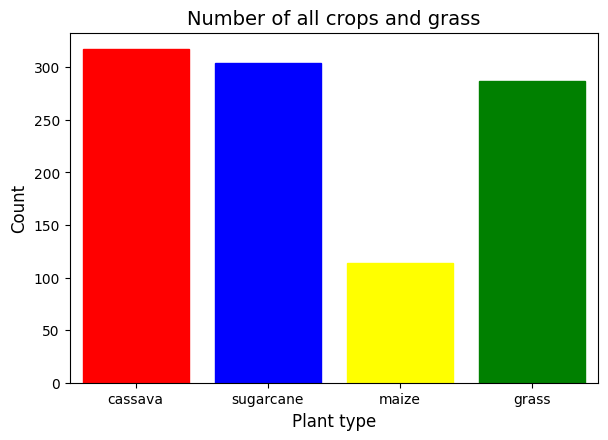

In [ ]:
#Plot the data
plant_count = train_data['label'].value_counts()
plt.figure(figsize=(15,10))
plt.subplot(221)
ax = sns.barplot(x=plant_count.index, y= plant_count.values)
plt.title('Number of all crops and grass', fontsize=14)
plt.xlabel('Plant type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(plant_count.index)), ['cassava', 'sugarcane', 'maize', 'grass']),

ax.patches[0].set_color('red')
ax.patches[1].set_color('blue')
ax.patches[2].set_color('yellow')
ax.patches[3].set_color('green')
plt.show()

In [ ]:
cassava_samples = (train_data[train_data['label']==0]['plant'].iloc[:5]).tolist()
sugarcane_samples = (train_data[train_data['label']==1]['plant'].iloc[:5]).tolist()
maize_samples = (train_data[train_data['label']==2]['plant'].iloc[:5]).tolist()
grass_samples = (train_data[train_data['label']==3]['plant'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = cassava_samples + sugarcane_samples + maize_samples + grass_samples

In [ ]:
print(samples)

['./data/cassava/cassava_46.jpg', './data/cassava/cassava_205.jpg', './data/cassava/cassava_97.jpg', './data/cassava/cassava_5.jpg', './data/cassava/cassava_77.jpg', './data/maize/maize_64.jpg', './data/maize/maize_250.jpg', './data/maize/maize_263.jpg', './data/maize/maize_65.jpg', './data/maize/maize_15.jpg', './data/sugarcane/sugarcane_53.jpg', './data/sugarcane/sugarcane_27.jpg', './data/sugarcane/sugarcane_75.jpg', './data/sugarcane/sugarcane_41.jpg', './data/sugarcane/sugarcane_58.jpg', './data/grass/grass_33.jpg', './data/grass/grass_227.jpg', './data/grass/grass_255.jpg', './data/grass/grass_202.jpg', './data/grass/grass_243.jpg']


In [ ]:
# Plot the data
f, ax = plt.subplots(4, 5, figsize=(30, 10))
for i in range(20):
    img = Image.open(samples[i])
    ax[i // 5, i % 5].imshow(img)
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_aspect('auto')
    ax[i // 5, i % 5].set_title(samples[i].split("/")[-1])  # Show the image name as the title
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Prepare the data for training

In [ ]:
# Set the path to the data directory
path = './data'

In [ ]:
# Retrieve the image paths
image_path = []
for file in os.listdir(path):
    dir = os.path.join(path, file)
    for file in os.listdir(dir):
        image_path.append(os.path.join(dir, file))

In [ ]:
# Define the function to preprocess the images
def preprocess_image(img, target_size):
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized / 255.0  # Normalize the pixel values
    return img_normalized

In [ ]:
print(image_path)

['./data/sugarcane/sugarcane_53.jpg', './data/sugarcane/sugarcane_27.jpg', './data/sugarcane/sugarcane_75.jpg', './data/sugarcane/sugarcane_41.jpg', './data/sugarcane/sugarcane_58.jpg', './data/sugarcane/sugarcane_7.jpg', './data/sugarcane/sugarcane_105.jpg', './data/sugarcane/sugarcane_74.jpg', './data/sugarcane/sugarcane_50.jpg', './data/sugarcane/sugarcane_84.jpg', './data/sugarcane/sugarcane_42.jpg', './data/sugarcane/sugarcane_87.jpg', './data/sugarcane/sugarcane_29.jpg', './data/sugarcane/sugarcane_37.jpg', './data/sugarcane/sugarcane_20.jpg', './data/sugarcane/sugarcane_67.jpg', './data/sugarcane/sugarcane_54.jpg', './data/sugarcane/sugarcane_112.jpg', './data/sugarcane/sugarcane_10.jpg', './data/sugarcane/sugarcane_49.jpg', './data/sugarcane/sugarcane_45.jpg', './data/sugarcane/sugarcane_91.jpg', './data/sugarcane/sugarcane_39.jpg', './data/sugarcane/sugarcane_22.jpg', './data/sugarcane/sugarcane_63.jpg', './data/sugarcane/sugarcane_19.jpg', './data/sugarcane/sugarcane_8.jpg', 

In [ ]:
# Set the desired target size for resizing
target_size = (256, 256)

# Preprocess the images and collect the labels
preprocessed_images = []
labels = []
for file in image_path:
    img = cv2.imread(file, 0)
    if img is not None:
        img_preprocessed = preprocess_image(img, target_size)
        preprocessed_images.append(img_preprocessed)
        labels.append(file.split('/')[2])

In [ ]:
# Convert the preprocessed images and labels to numpy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

In [ ]:
# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
# Split data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, encoded_labels, test_size=0.2, random_state=0, stratify=encoded_labels)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

In [ ]:
# Define the CNN model
num_classes = 4
cnn_model = tf.keras.Sequential([
    # layers.Conv2D(128, (3, 3), activation='relu', input_shape=target_size + (1,)),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=target_size + (1,)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Define the optimizer with a specific learning rate
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# Compile the model
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
26/26 [==============================] - 3s 21ms/step - loss: 1.3737 - accuracy: 0.2999 - val_loss: 1.3630 - val_accuracy: 0.3107
Epoch 2/100
26/26 [==============================] - 0s 12ms/step - loss: 1.3543 - accuracy: 0.3097 - val_loss: 1.3436 - val_accuracy: 0.3107
Epoch 3/100
26/26 [==============================] - 0s 12ms/step - loss: 1.3383 - accuracy: 0.3097 - val_loss: 1.3267 - val_accuracy: 0.3107
Epoch 4/100
26/26 [==============================] - 0s 12ms/step - loss: 1.3234 - accuracy: 0.3097 - val_loss: 1.3126 - val_accuracy: 0.3107
Epoch 5/100
26/26 [==============================] - 0s 13ms/step - loss: 1.3093 - accuracy: 0.3097 - val_loss: 1.2978 - val_accuracy: 0.3107
Epoch 6/100
26/26 [==============================] - 0s 12ms/step - loss: 1.2945 - accuracy: 0.3219 - val_loss: 1.2828 - val_accuracy: 0.3786
Epoch 7/100
26/26 [==============================] - 0s 13ms/step - loss: 1.2790 - accuracy: 0.4761 - val_loss: 1.2661 - val_accuracy: 0.4563
Epoch 

In [ ]:
# Evaluate the trained model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.9608
Test Loss: 0.23224294185638428
Test Accuracy: 0.9607843160629272


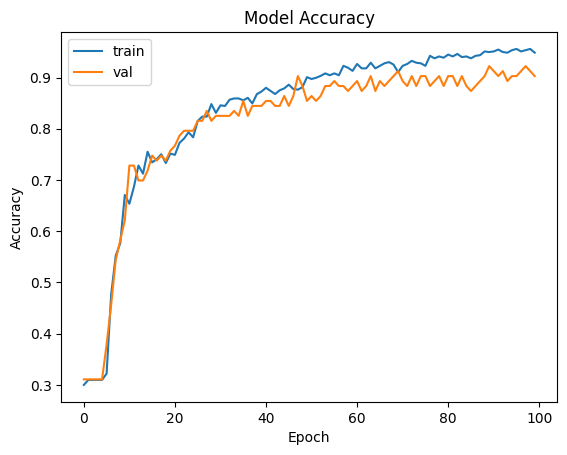

In [ ]:
# Plot the learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

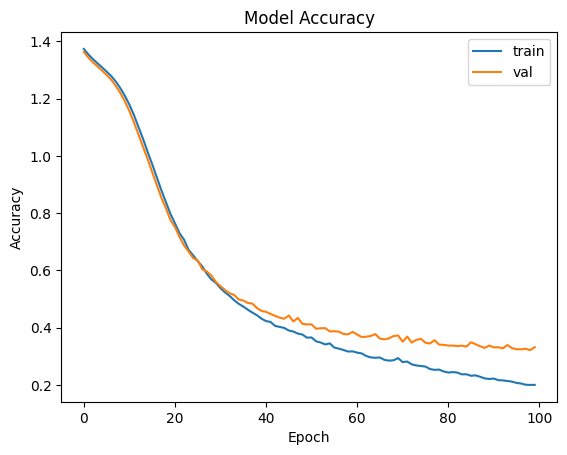

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Get the predicted labels for the validation data
y_pred = np.argmax(cnn_model.predict(X_val), axis=1)

# Generate classification report
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
classification_rep = classification_report(y_val, y_pred, target_names=class_names)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)

print("Classification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)

4/4 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.91      0.89        32
     Class 1       0.93      0.90      0.91        29
     Class 2       0.90      0.90      0.90        31
     Class 3       0.91      0.91      0.91        11

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103


Confusion Matrix:
[[29  1  1  1]
 [ 1 26  2  0]
 [ 2  1 28  0]
 [ 1  0  0 10]]


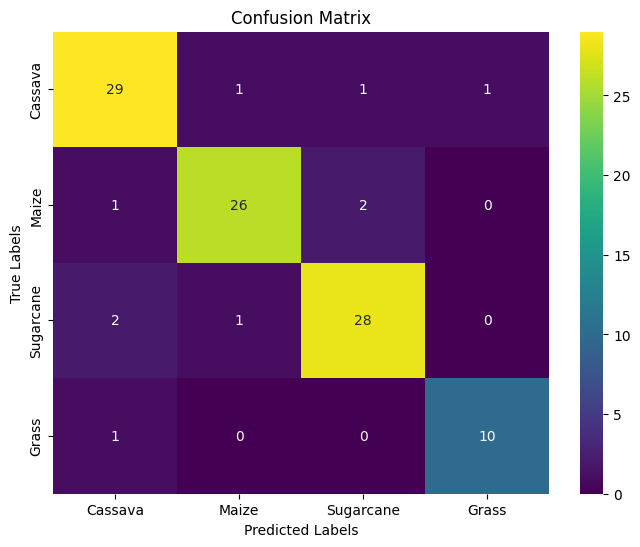

In [ ]:
# Define class names
class_names = ['Cassava', 'Maize', 'Sugarcane', 'Grass']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "viridis", cbar="True",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Mobilenet

In [ ]:
def preprocess_image(img, target_size):
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized.astype(np.float32) / 255.0
    img_rgb = cv2.cvtColor(img_normalized, cv2.COLOR_GRAY2RGB)
    return img_rgb

In [ ]:
target_size

(256, 256)

In [ ]:
preprocessed_images = []
labels = []
for file in image_path:
    img = cv2.imread(file, 0)
    if img is not None:
        img_preprocessed = preprocess_image(img, target_size)
        preprocessed_images.append(img_preprocessed)
        labels.append(file.split('/')[2])

In [ ]:
# Convert the preprocessed images and labels to numpy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
# Split data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, encoded_labels, test_size=0.2, random_state=0, stratify=encoded_labels)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

In [ ]:
# Preprocess input images for MobileNet
X_train = np.stack([img_to_array(image) for image in X_train], axis=0)
X_test = np.stack([img_to_array(image) for image in X_test], axis=0)
X_val = np.stack([img_to_array(image) for image in X_val], axis=0)

In [ ]:
# Convert RGB images to BGR for MobileNet
X_train = tf.keras.applications.mobilenet.preprocess_input(X_train)
X_test = tf.keras.applications.mobilenet.preprocess_input(X_test)
X_val = tf.keras.applications.mobilenet.preprocess_input(X_val)

In [ ]:
# Load MobileNet model (pre-trained on ImageNet)
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=target_size + (3,))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
num_classes = 4
transfer_model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Define the optimizer with a specific learning rate
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
transfer_model.compile(optimizer=optimizer,
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
history = transfer_model.fit(X_train, y_train, epochs=2000, batch_size=32,
                             validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/2000
26/26 [==============================] - 3s 43ms/step - loss: 1.4888 - accuracy: 0.2020 - val_loss: 1.4834 - val_accuracy: 0.1553
Epoch 2/2000
26/26 [==============================] - 0s 19ms/step - loss: 1.4688 - accuracy: 0.2166 - val_loss: 1.4653 - val_accuracy: 0.1845
Epoch 3/2000
26/26 [==============================] - 0s 19ms/step - loss: 1.4518 - accuracy: 0.2375 - val_loss: 1.4481 - val_accuracy: 0.2330
Epoch 4/2000
26/26 [==============================] - 0s 19ms/step - loss: 1.4358 - accuracy: 0.2534 - val_loss: 1.4334 - val_accuracy: 0.2718
Epoch 5/2000
26/26 [==============================] - 0s 18ms/step - loss: 1.4219 - accuracy: 0.2619 - val_loss: 1.4206 - val_accuracy: 0.2621
Epoch 6/2000
26/26 [==============================] - 0s 19ms/step - loss: 1.4101 - accuracy: 0.2778 - val_loss: 1.4086 - val_accuracy: 0.2913
Epoch 7/2000
26/26 [==============================] - 0s 19ms/step - loss: 1.3989 - accuracy: 0.2876 - val_loss: 1.3989 - val_accuracy: 0.2913

In [ ]:
# Evaluate the trained model on the test set
test_loss, test_accuracy = transfer_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 13ms/step - loss: 0.4729 - accuracy: 0.8333
Test Loss: 0.4728674292564392
Test Accuracy: 0.8333333134651184


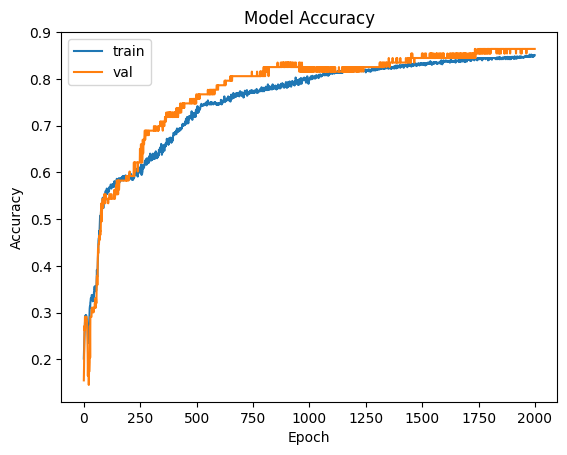

In [ ]:
# Plot the learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

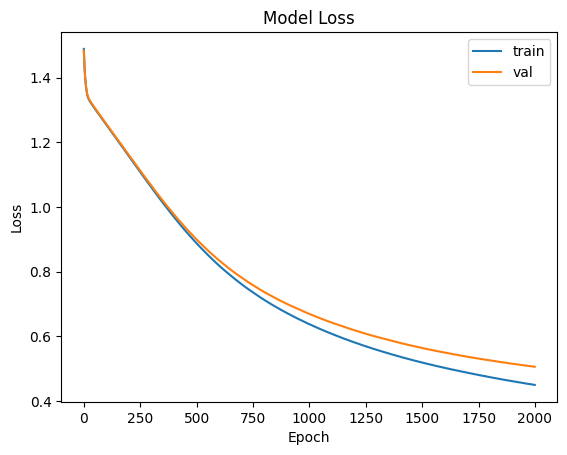

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Generate classification report
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
classification_rep = classification_report(y_val, y_pred, target_names=class_names)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)

print("Classification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.84      0.87        32
     Class 1       0.93      0.90      0.91        29
     Class 2       0.90      0.90      0.90        31
     Class 3       0.79      1.00      0.88        11

    accuracy                           0.89       103
   macro avg       0.88      0.91      0.89       103
weighted avg       0.90      0.89      0.89       103


Confusion Matrix:
[[27  1  1  3]
 [ 1 26  2  0]
 [ 2  1 28  0]
 [ 0  0  0 11]]


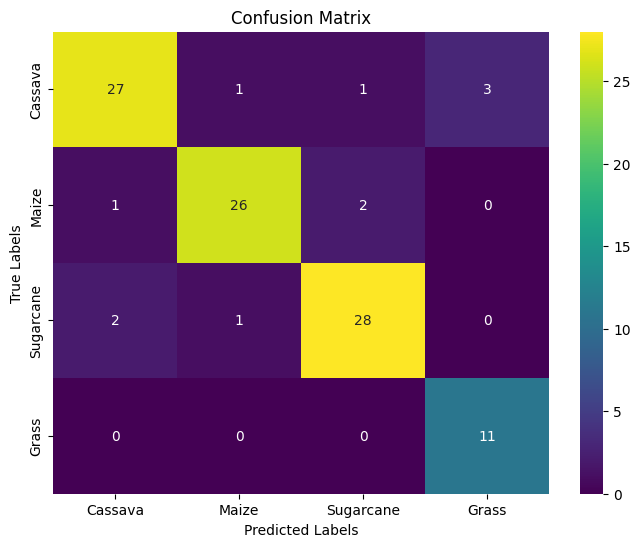

In [ ]:
# Define class names
class_names = ['Cassava', 'Maize', 'Sugarcane', 'Grass']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "viridis", cbar="True",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Save the trained model in HDF5 format
transfer_model.save('modelnetmodel.h5')

In [ ]:
# Save the trained model in HDF5 format
cnn_model.save('cnnmodel.h5')